In [74]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter

# Import Data 

In [ ]:
#I didn't split test and train data here because for this case all our datasets with target are training data, the testing data is used for ranking, so I believe it would not result in any data leakerage

In [130]:
train_values = pd.read_csv('Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv', index_col='building_id')
train_labels = pd.read_csv('Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv', index_col='building_id')

test_values = pd.read_csv('Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv', index_col='building_id')

In [131]:
#explore X variables
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [132]:
#explore target
train_labels 

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3
...,...
688636,2
669485,3
602512,3


# Check missing values - No missing values 

In [133]:
train_values.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [134]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

# Check Outliers - Did NOT remove any outliers

In [135]:
train_values.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plot Distribution for all continuous variables

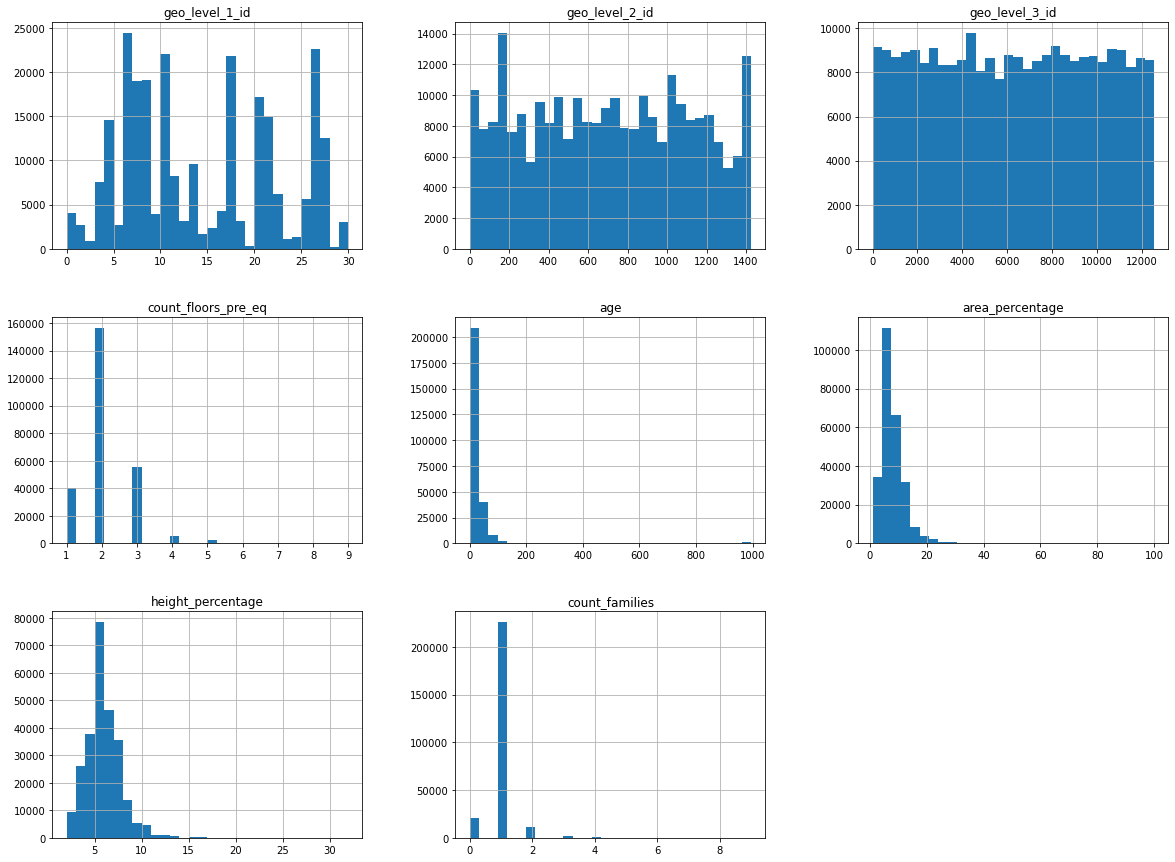

In [136]:
%matplotlib inline
train_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage','count_families']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [137]:
num_features=['geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage','count_families']

In [138]:
category_features = train_values.drop(num_features,axis=1)


In [139]:
category_features

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,t,r,n,f,q,t,d,1,1,0,...,0,0,0,0,0,0,0,0,0,0
28830,o,r,n,x,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94947,t,r,n,f,x,t,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
590882,t,r,n,f,x,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
201944,t,r,n,f,x,s,d,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,n,r,n,f,j,s,q,0,1,0,...,0,0,0,0,0,0,0,0,0,0
669485,t,r,n,f,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0
602512,t,r,q,f,q,s,d,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
#explore distinct values for each catgorical variables
for col in category_features:
    print(col, "(", len(train_values[col].unique()) , "values):\n", np.sort(train_values[col].unique()))

land_surface_condition ( 3 values):
 ['n' 'o' 't']
foundation_type ( 5 values):
 ['h' 'i' 'r' 'u' 'w']
roof_type ( 3 values):
 ['n' 'q' 'x']
ground_floor_type ( 5 values):
 ['f' 'm' 'v' 'x' 'z']
other_floor_type ( 4 values):
 ['j' 'q' 's' 'x']
position ( 4 values):
 ['j' 'o' 's' 't']
plan_configuration ( 10 values):
 ['a' 'c' 'd' 'f' 'm' 'n' 'o' 'q' 's' 'u']
has_superstructure_adobe_mud ( 2 values):
 [0 1]
has_superstructure_mud_mortar_stone ( 2 values):
 [0 1]
has_superstructure_stone_flag ( 2 values):
 [0 1]
has_superstructure_cement_mortar_stone ( 2 values):
 [0 1]
has_superstructure_mud_mortar_brick ( 2 values):
 [0 1]
has_superstructure_cement_mortar_brick ( 2 values):
 [0 1]
has_superstructure_timber ( 2 values):
 [0 1]
has_superstructure_bamboo ( 2 values):
 [0 1]
has_superstructure_rc_non_engineered ( 2 values):
 [0 1]
has_superstructure_rc_engineered ( 2 values):
 [0 1]
has_superstructure_other ( 2 values):
 [0 1]
legal_ownership_status ( 4 values):
 ['a' 'r' 'v' 'w']
has_seco

# Exploring target - Check if our data is balanced or not

<AxesSubplot:title={'center':'Number of Buildings with Each Damage Grade'}>

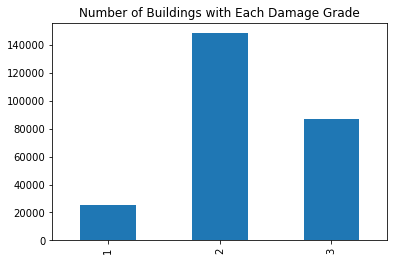

In [141]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

# Combine X and Y

In [142]:
train_values_join=train_values.copy()

In [143]:
train_values_join

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [144]:
train_values_join["damage_grade"]=train_labels["damage_grade"]

In [145]:
train_values_join

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


# Data Exploration: Plot all categorical variables with target using Violin Plot

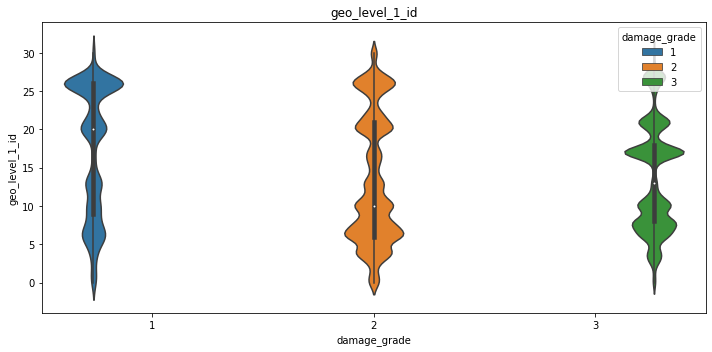

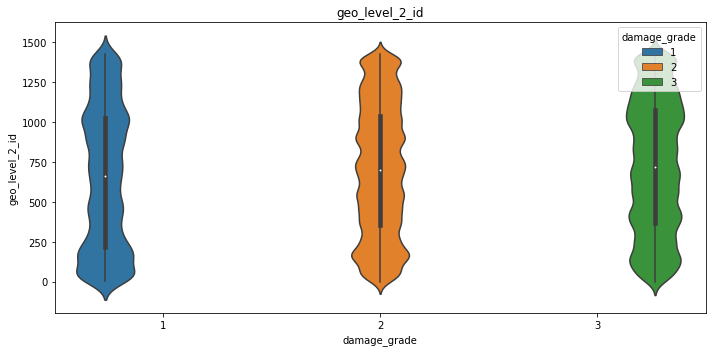

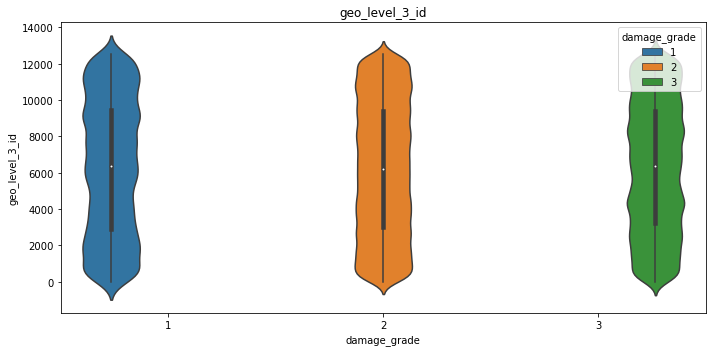

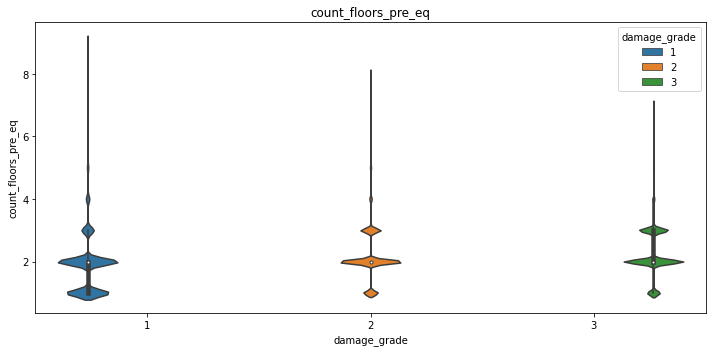

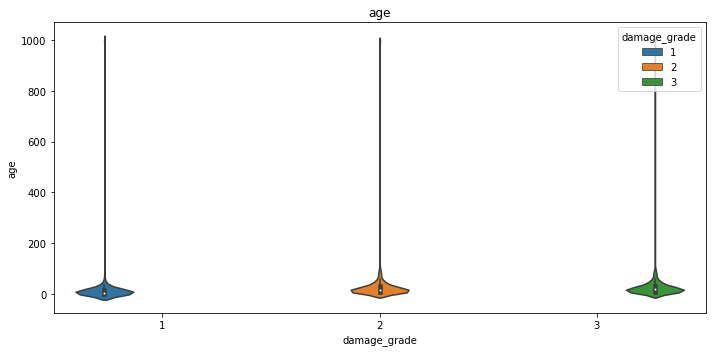

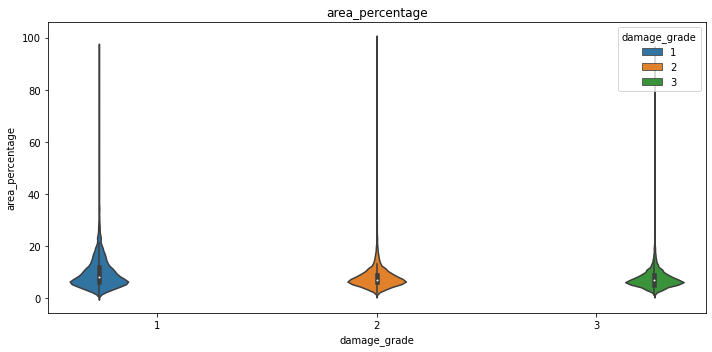

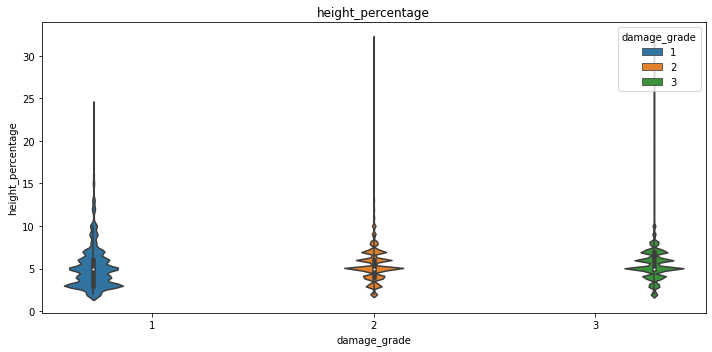

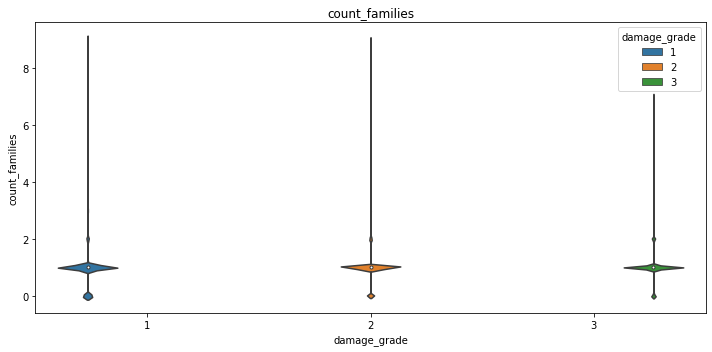

In [146]:
for col in num_features:
    plt.figure(figsize=(10,5))    
  
    
    sns.violinplot(data=train_values_join,x='damage_grade',y=train_values_join[col],hue='damage_grade')
    
    plt.title(col)    
    plt.tight_layout()

# Feature Engineering - I did Target Encoding first, then OneHot, tbh I dont think OneHot is necessary because most of the model algo would capture it

In [147]:
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [148]:
train_values['geo_level_1_id']=pd.Categorical(train_values['geo_level_1_id'])
train_values['geo_level_1_id']

building_id
802906     6
28830      8
94947     21
590882    22
201944    11
          ..
688636    25
669485    17
602512    17
151409    26
747594    21
Name: geo_level_1_id, Length: 260601, dtype: category
Categories (31, int64): [0, 1, 2, 3, ..., 27, 28, 29, 30]

In [149]:
train_values['geo_level_2_id']=pd.Categorical(train_values['geo_level_2_id'])
train_values['geo_level_2_id']

building_id
802906     487
28830      900
94947      363
590882     418
201944     131
          ... 
688636    1335
669485     715
602512      51
151409      39
747594       9
Name: geo_level_2_id, Length: 260601, dtype: category
Categories (1414, int64): [0, 1, 3, 4, ..., 1424, 1425, 1426, 1427]

In [150]:
train_values['geo_level_3_id']=pd.Categorical(train_values['geo_level_3_id'])
train_values['geo_level_3_id']

building_id
802906    12198
28830      2812
94947      8973
590882    10694
201944     1488
          ...  
688636     1621
669485     2060
602512     8163
151409     1851
747594     9101
Name: geo_level_3_id, Length: 260601, dtype: category
Categories (11595, int64): [0, 1, 3, 5, ..., 12563, 12564, 12565, 12567]

In [151]:
train_labels['damage_grade']

building_id
802906    3
28830     2
94947     3
590882    2
201944    3
         ..
688636    2
669485    3
602512    3
151409    2
747594    3
Name: damage_grade, Length: 260601, dtype: int64

# Target Encoding

In [152]:

from category_encoders import TargetEncoder

encoder = TargetEncoder()
train_values[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id']] = encoder.fit_transform(train_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id']], train_labels['damage_grade'])


In [153]:
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2.161724,2.740741,2.837838,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,2.485273,2.487437,2.062500,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,2.563369,2.518750,2.580882,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,2.000960,2.107317,2.096774,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,2.337713,2.348748,2.368852,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2.054054,1.931034,2.071429,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
669485,2.794480,2.931034,2.979592,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
602512,2.794480,2.894895,2.818182,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


# OneHOT

In [154]:
train_values= pd.get_dummies(train_values)

In [155]:
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2.161724,2.740741,2.837838,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,2.485273,2.487437,2.062500,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,2.563369,2.518750,2.580882,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,2.000960,2.107317,2.096774,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,2.337713,2.348748,2.368852,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2.054054,1.931034,2.071429,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,2.794480,2.931034,2.979592,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,2.794480,2.894895,2.818182,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Spliting Data

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size=0.25, random_state=0)

type(X_train)
type(y_train)

pandas.core.frame.DataFrame

In [157]:
y_train

,damage_grade
building_id,
294725,3
553892,2
79646,2
884013,3
83140,2
...,...
1043968,1
188882,3
507711,3


# Logistic Regression - with Target Encoding and OneHot

In [158]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_test)

In [159]:
lr_clf.coef_
lr_clf.intercept_

array([ 0.39004997,  0.50504045, -0.89509042])

In [160]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))

[[ 2263  3860   123]
 [ 2073 30082  4813]
 [  172  8402 13363]]


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.50      0.36      0.42      6246
           2       0.71      0.81      0.76     36968
           3       0.73      0.61      0.66     21937

    accuracy                           0.70     65151
   macro avg       0.65      0.60      0.61     65151
weighted avg       0.70      0.70      0.69     65151



In [162]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_lr, average='micro')))

F1 Score = 0.70


# Decision Tree - with Target Encoding and OneHot

In [163]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=23, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

In [164]:
class_names = [str(x) for x in clf.classes_]

In [165]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)

array([[    0,  5886,   360],
       [    0, 29604,  7364],
       [    0,  5966, 15971]])

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6246
           2       0.71      0.80      0.75     36968
           3       0.67      0.73      0.70     21937

    accuracy                           0.70     65151
   macro avg       0.46      0.51      0.48     65151
weighted avg       0.63      0.70      0.66     65151



In [167]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt, average='micro')))

F1 Score = 0.70


# Random Forest - with Target Encodig and OneHot

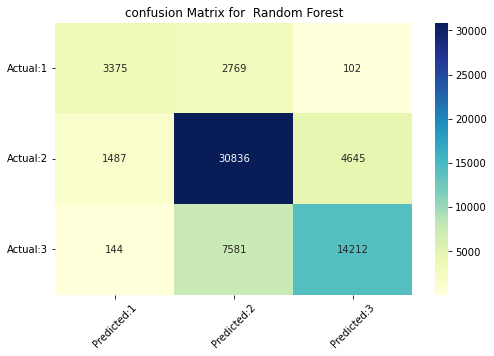

In [168]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=None,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [169]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, rf_pred, average='micro')))

F1 Score = 0.74


# Naive Bayes - Raw Model with OneHot Only

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

In [32]:
gnb.theta_ # Mean of each feature per class
gnb.sigma_ # Variance of each feature per class

array([[7.23215489e+01, 1.93377616e+05, 1.40810730e+07, 6.92377887e-01,
        7.16972895e+03, 3.90099891e+01, 6.27581583e+00, 3.60889057e-02,
        2.40759460e-01, 2.06020200e-02, 4.53846675e-02, 3.76601142e-02,
        2.16888021e-01, 2.25011439e-01, 1.15476872e-01, 1.42643160e-01,
        1.07088654e-01, 3.88727899e-02, 2.55455702e-01, 1.53946026e-01,
        4.69233440e-02, 9.25352472e-02, 4.61795038e-02, 1.76545908e-02,
        1.45300195e-02, 1.59623586e-02, 1.37856972e-02, 1.38920970e-02,
        1.34131190e-02, 2.02870749e-02, 1.03404594e-01, 3.59873502e-02,
        1.21435660e-01, 2.78927658e-02, 1.94021342e-01, 2.58025879e-01,
        1.40076716e-01, 1.55804911e-01, 2.61704827e-01, 1.45365565e-01,
        2.24656276e-01, 2.63297240e-01, 1.67563157e-02, 2.55143513e-01,
        8.83726748e-02, 2.14408753e-02, 2.42144944e-01, 2.21276922e-01,
        1.81745682e-01, 1.30862100e-01, 7.51224490e-02, 1.81294845e-02,
        1.78396313e-01, 1.31945249e-01, 1.60153288e-02, 1.665052

In [33]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 3499,   884,  1964],
       [ 4474,  5163, 27357],
       [  708,  1644, 19458]])

In [34]:
print(classification_report(y_test, y_pred_gnb, target_names=class_names))

              precision    recall  f1-score   support

           1       0.40      0.55      0.47      6347
           2       0.67      0.14      0.23     36994
           3       0.40      0.89      0.55     21810

    accuracy                           0.43     65151
   macro avg       0.49      0.53      0.42     65151
weighted avg       0.55      0.43      0.36     65151



In [35]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gnb, average='micro')))

F1 Score = 0.43


# KNN - with OneHot only

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

In [37]:
knn_clf.effective_metric_
knn_clf.effective_metric_params_

{}

In [38]:
print(confusion_matrix(y_test, y_pred_knn))

[[ 3291  2728   328]
 [ 2500 28070  6424]
 [  517  7596 13697]]


In [39]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn, average='micro')))

F1 Score = 0.69


# SVM - takes too long

In [ ]:
# from sklearn.svm import SVC

# svm_clf = SVC(kernel="linear", C=0.025)
# svm_clf.fit(X_train, y_train)

# y_pred_svm = svm_clf.predict(X_test)

In [ ]:
# svm_clf.n_support_

In [ ]:
# svm_clf.dual_coef_ 

In [ ]:
# svm_clf.intercept_ 

In [ ]:
# print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
# print(classification_report(y_test, y_pred_svm, target_names=class_names))

In [ ]:
# from sklearn.metrics import f1_score

# print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn, average='micro')))

# NN - with OneHot only

In [40]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-3, max_iter=1500,
                       hidden_layer_sizes=(10, 10), random_state=1, verbose=True)
nn_clf.fit(X_train, y_train)

y_pred_nn = nn_clf.predict(X_test)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          833     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38845D+01    |proj g|=  2.06752D+03

At iterate    1    f=  1.55120D+01    |proj g|=  1.38139D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  833      2     42      2     0     0   1.381D+03   1.551D+01
  F =   15.511974249280783     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [41]:
nn_clf.loss_

15.511974247409599

In [42]:
nn_clf.n_layers_

4

In [43]:
w = nn_clf.coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.
w

[array([[-4.54566943e-02,  1.22215079e-01, -2.77286654e-01,
         -1.10680252e-01, -1.95394926e-01, -2.26748827e-01,
         -1.74031555e-01, -8.56689430e-02, -5.72631023e-02,
          2.09927583e-02],
        [-1.85093158e-02,  1.04193439e-01, -1.63940395e-01,
          1.61571861e-01, -2.36761452e-01,  6.54602284e-02,
         -4.58726325e-02,  3.24045504e-02, -1.99477436e-01,
         -1.94367257e-01],
        [ 4.83740477e-01,  2.60283987e-01, -1.03493645e-01,
         -3.90537650e-01,  4.74898449e-01, -8.19997811e-02,
         -2.30177059e-01, -2.55695571e-01, -1.83145131e-01,
         -2.45289369e-02],
        [-2.22707428e-01, -4.37575509e-02,  2.53991412e-01,
          1.82442722e-02,  1.06514403e-01, -1.02425648e-01,
          1.03452090e-01,  1.85616608e-01, -2.67205587e-01,
          1.38675293e-01],
        [ 2.72258291e-01,  1.37789378e-01, -1.21787761e-01,
          1.58504879e-01, -2.19073393e-01, -2.99651605e-02,
          2.26645981e-01, -1.14485622e-01, -1.177210

In [44]:
b = nn_clf.intercepts_ # The ith element in the list represents the bias vector corresponding to layer i + 1.
b

[array([ 0.12698594,  0.0092586 ,  0.11479867,  0.15553637, -0.06936765,
         0.14990375,  0.13902135,  0.06279814, -0.05443499,  0.10940853]),
 array([-0.07346218, -0.15609053, -0.18594866,  0.2161259 , -0.25343109,
         0.33771248, -0.22424699,  0.0483965 , -0.01323134,  0.38923898]),
 array([ 0.15435975,  0.20165425, -0.44862226])]

In [45]:
nn_clf.out_activation_

'softmax'

In [47]:
print(confusion_matrix(y_test, y_pred_nn))

[[    0  6347     0]
 [    0 36994     0]
 [    0 21810     0]]


In [48]:
print(classification_report(y_test, y_pred_nn, target_names=class_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6347
           2       0.57      1.00      0.72     36994
           3       0.00      0.00      0.00     21810

    accuracy                           0.57     65151
   macro avg       0.19      0.33      0.24     65151
weighted avg       0.32      0.57      0.41     65151



In [49]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_nn, average='micro')))

F1 Score = 0.57


# AdaBoostClassifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier
adab_clf = AdaBoostClassifier(n_estimators=100, random_state=23)
adab_clf.fit(X_train, y_train)

y_pred_adab = adab_clf.predict(X_test)

In [51]:
print(confusion_matrix(y_test, y_pred_adab))

[[ 2193  4110    44]
 [ 1463 31859  3672]
 [   76 12865  8869]]


In [52]:
print(classification_report(y_test, y_pred_adab, target_names=class_names))

              precision    recall  f1-score   support

           1       0.59      0.35      0.44      6347
           2       0.65      0.86      0.74     36994
           3       0.70      0.41      0.52     21810

    accuracy                           0.66     65151
   macro avg       0.65      0.54      0.56     65151
weighted avg       0.66      0.66      0.64     65151



In [53]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_adab, average='micro')))

F1 Score = 0.66


# GradiantBoosting - with OneHot only

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf =  GradientBoostingClassifier(n_estimators=100, random_state=23)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred_gb))

[[ 2376  3921    50]
 [ 1238 31901  3855]
 [   75 11645 10090]]


In [56]:
print(classification_report(y_test, y_pred_gb, target_names=class_names))

              precision    recall  f1-score   support

           1       0.64      0.37      0.47      6347
           2       0.67      0.86      0.76     36994
           3       0.72      0.46      0.56     21810

    accuracy                           0.68     65151
   macro avg       0.68      0.57      0.60     65151
weighted avg       0.69      0.68      0.66     65151



In [57]:
from sklearn.metrics import f1_score

print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gb, average='micro')))

F1 Score = 0.68


# XGBoost - My final model algo

In [20]:
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2.161724,2.740741,2.837838,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,2.485273,2.487437,2.062500,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,2.563369,2.518750,2.580882,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,2.000960,2.107317,2.096774,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,2.337713,2.348748,2.368852,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2.054054,1.931034,2.071429,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,2.794480,2.931034,2.979592,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,2.794480,2.894895,2.818182,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Scaling - only did Yeo-Johnson Scaling for XGboost because it is my final model algo

In [43]:

scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X_train)

X_train_te_yj=scaler.transform(X_train)
X_test_te_yj=scaler.transform(X_test)


In [44]:
X_test

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
1023112,2.341954,2.476415,2.285714,1,20,7,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
64407,2.000960,1.656716,1.444711,2,60,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
967834,1.730887,1.532194,1.534066,2,50,6,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36669,2.485273,2.142473,2.086957,3,50,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
242842,2.161724,2.115741,2.076923,2,15,8,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397854,2.794480,2.908696,2.875000,2,35,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
739279,2.485273,2.322284,2.181818,3,25,5,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
246604,2.485273,2.313993,2.241379,2,20,4,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
train_labels['damage_grade']

building_id
802906    3
28830     2
94947     3
590882    2
201944    3
         ..
688636    2
669485    3
602512    3
151409    2
747594    3
Name: damage_grade, Length: 260601, dtype: int64

In [23]:
y_train

,damage_grade
building_id,
184292,2
85957,3
227366,2
617536,2
406641,2
...,...
79888,3
442764,3
17256,2


In [174]:
y_train.value_counts()

damage_grade
2               111291
3                65281
1                18878
dtype: int64

In [175]:
y_train=y_train-1

In [176]:
y_train.value_counts()

damage_grade
1               111291
2                65281
0                18878
dtype: int64

In [47]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(min_child_weight= 5, learning_rate= 0.1, gamma= 0.05, subsample= 0.8,colsample_bytree= 0.3, colsample_bynode= 0.8,
 colsample_bylevel= 0.8, max_depth = 20, n_estimators = 150, random_state=0)
xgb_clf.fit(X_train_te_yj, y_train)

y_pred_xgb = xgb_clf.predict(X_test_te_yj)

In [48]:
y_test.value_counts()

damage_grade
1               36994
2               21810
0                6347
dtype: int64

In [32]:
y_test=y_test-1

In [33]:
y_test.value_counts()

damage_grade
1               36994
2               21810
0                6347
dtype: int64

In [49]:
print(confusion_matrix(y_test, y_pred_xgb))

[[ 3507  2761    79]
 [ 1358 31299  4337]
 [  129  7382 14299]]


# The final model - best f1 score!

In [51]:
from sklearn.metrics import f1_score

print("F1 Score = {:.6f}".format(f1_score(y_test, y_pred_xgb, average='micro')))

F1 Score = 0.753711


# Feature Selection - tried but reduce f1 score, does not work

In [578]:
# filter method
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=20)
sel = sel.fit(X_train, y_train)

X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)

X_train_new.shape

clf = xgb.XGBClassifier(random_state=0)
clf.fit(X_train_new, y_train)
y_pred_fs = clf.predict(X_test_new)
print(classification_report(y_test, y_pred_fs))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60      6347
           1       0.75      0.85      0.80     36994
           2       0.77      0.64      0.70     21810

    accuracy                           0.75     65151
   macro avg       0.74      0.68      0.70     65151
weighted avg       0.75      0.75      0.75     65151



In [588]:
from sklearn.metrics import f1_score

print("F1 Score = {:.6f}".format(f1_score(y_test, y_pred, average='micro')))

F1 Score = 0.578349


In [586]:
#Recursive Feature Elimination (Wrapper Method)
from sklearn.feature_selection import RFECV, RFE
clf = xgb.XGBClassifier(min_child_weight= 5, learning_rate= 0.1, gamma= 0.05, subsample= 0.8,colsample_bytree= 0.3, colsample_bynode= 0.8,
 colsample_bylevel= 0.8, max_depth = 20, n_estimators = 150, random_state=0)
sel = RFE(estimator=clf, n_features_to_select=50)
sel = sel.fit(X_train, y_train)

X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)

X_train_new.shape

clf = xgb.XGBClassifier(random_state=23)
clf.fit(X_train_new, y_train)
y_pred_fs2 = clf.predict(X_test_new)
print(classification_report(y_test, y_pred_fs2))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62      6347
           1       0.75      0.85      0.80     36994
           2       0.77      0.65      0.70     21810

    accuracy                           0.75     65151
   macro avg       0.74      0.68      0.71     65151
weighted avg       0.75      0.75      0.75     65151



In [587]:
from sklearn.metrics import f1_score

print("F1 Score = {:.6f}".format(f1_score(y_test, y_pred_fs2, average='micro')))

F1 Score = 0.752590


# Hyperparameter tuning - WIP

In [590]:
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2.161724,2.740741,2.837838,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,2.485273,2.487437,2.062500,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,2.563369,2.518750,2.580882,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,2.000960,2.107317,2.096774,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,2.337713,2.348748,2.368852,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2.054054,1.931034,2.071429,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,2.794480,2.931034,2.979592,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,2.794480,2.894895,2.818182,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [602]:
train_labels=train_labels-1

In [603]:
train_labels

,damage_grade
building_id,
802906,2
28830,1
94947,2
590882,1
201944,2
...,...
688636,1
669485,2
602512,2


# GridSearch

In [170]:
parameters = {'max_depth' : [5, 10, 15, 20, 25, 30,35, 40]} #first looking for an optimal max_depth

In [177]:
from sklearn.model_selection import GridSearchCV
#grid search cv tries all the parameters individually using cross validation, default set to 5 folds
grid_search = GridSearchCV(xgb.XGBClassifier(), parameters, scoring="f1_micro", n_jobs=-1, verbose=3)
grid_result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 4/5] END .........................max_depth=5;, score=nan total time=   0.6s
[CV 2/5] END ........................max_depth=10;, score=nan total time=   0.1s
[CV 2/5] END ........................max_depth=15;, score=nan total time=   0.1s
[CV 1/5] END ........................max_depth=20;, score=nan total time=   0.2s
[CV 4/5] END ........................max_depth=20;, score=nan total time=   0.3s
[CV 4/5] END ........................max_depth=25;, score=nan total time=   0.2s
[CV 5/5] END ........................max_depth=25;, score=nan total time=   0.1s
[CV 5/5] END ........................max_depth=30;, score=nan total time=   0.1s
[CV 3/5] END ........................max_depth=35;, score=nan total time=   0.1s
[CV 2/5] END ........................max_depth=40;, score=nan total time=   0.2s
[CV 3/5] END .......................max_depth=5;, score=0.757 total time= 5.7min
[CV 5/5] END .......................max_depth=5;,

NameError: name 'pyplot' is not defined

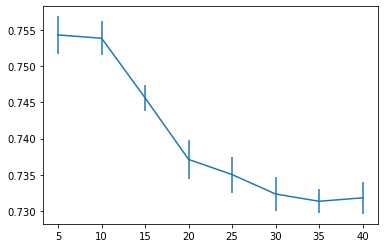

In [179]:
def plot_score(grid_result, parameters, name):    
    means = grid_result.cv_results_['mean_test_score'] #get the means of the scores from the 5 folds
    stds = grid_result.cv_results_['std_test_score'] #standard error of scores for plotting error bars

    # plot scores vs parameter
    plt.errorbar(parameters[name], means, yerr=stds)
    pyplot.xlabel(name)
    pyplot.ylabel('f1 score')
    
plot_score(grid_result,parameters, 'max_depth')

In [180]:
xgbc = xgb.XGBRFClassifier(max_depth = 5)

In [181]:
n_estimators = [50, 100, 150, 200]
param2 = {'n_estimators':n_estimators}

In [182]:
grid_search_estimators = GridSearchCV(xgbc, param2, scoring="f1_micro", n_jobs=-1, verbose=3)
grid_result_estimators = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 3/5] END .......................max_depth=5;, score=0.757 total time= 4.9min
[CV 5/5] END .......................max_depth=5;, score=0.750 total time= 5.2min
[CV 4/5] END ......................max_depth=10;, score=0.757 total time= 9.9min
[CV 3/5] END ......................max_depth=15;, score=0.745 total time=15.0min
[CV 2/5] END ......................max_depth=20;, score=0.737 total time=77.3min
[CV 1/5] END .....................max_depth=25;, score=0.735 total time=142.6min
[CV 5/5] END ......................max_depth=25;, score=0.733 total time=25.9min
[CV 4/5] END .....................max_depth=30;, score=0.737 total time=594.0min
[CV 3/5] END ......................max_depth=35;, score=0.729 total time=33.3min
[CV 2/5] END ......................max_depth=40;, score=0.731 total time=38.0min
[CV 2/5] END .......................max_depth=5;, score=0.754 total time= 4.9min
[CV 1/5] END ......................max_depth=10;,

In [1]:
# plot_score(grid_result_estimators,param2, 'n_estimators')

In [ ]:
xgbc = xgb.XGBClassifier(max_depth = 5, n_estimators = 150)

In [ ]:
#Random Search

In [ ]:
params={
 "learning_rate"    : [0.1, 0.2, 0.3] ,
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.05, 0.1, 0.2 , 0.3],
 "colsample_bylevel" :[0.2, 0.5, 0.8, 1.0],
 "colsample_bynode": [0.2, 0.5, 0.8, 1.0],
 "subsample": [0.2, 0.5, 0.8, 1.0],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(xgbc,param_distributions=params ,n_iter=10,scoring='f1_micro',n_jobs=-1, verbose = 3)

In [ ]:
rand_res = rand_search.fit(x, y)

In [ ]:
best_params = rand_res.best_params_

In [ ]:
best_params = {'subsample': 0.8,
 'min_child_weight': 5,
 'learning_rate': 0.1,
 'gamma': 0.05,
 'colsample_bytree': 0.3,
 'colsample_bynode': 0.8,
 'colsample_bylevel': 0.8}

# The final XGboost model is using the best_params

# Make prediction and save submission 

In [178]:
test_values = pd.read_csv('Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv', index_col='building_id')

In [53]:
test_values = pd.get_dummies(test_values)

In [54]:
test_values['geo_level_1_id']=pd.Categorical(test_values['geo_level_1_id'])
test_values['geo_level_1_id']

building_id
300051     17
99355       6
890251     22
745817     26
421793     17
           ..
310028      4
663567     10
1049160    22
442785      6
501372     26
Name: geo_level_1_id, Length: 86868, dtype: category
Categories (31, int64): [0, 1, 2, 3, ..., 27, 28, 29, 30]

In [55]:
test_values['geo_level_2_id']=pd.Categorical(test_values['geo_level_2_id'])
test_values['geo_level_2_id']

building_id
300051      596
99355       141
890251       19
745817       39
421793      289
           ... 
310028      605
663567     1407
1049160    1136
442785     1041
501372       36
Name: geo_level_2_id, Length: 86868, dtype: category
Categories (1364, int64): [0, 1, 3, 4, ..., 1424, 1425, 1426, 1427]

In [56]:
test_values['geo_level_3_id']=pd.Categorical(test_values['geo_level_3_id'])
test_values['geo_level_3_id']

building_id
300051     11307
99355      11987
890251     10044
745817       633
421793      7970
           ...  
310028      3623
663567     11907
1049160     7712
442785       912
501372      6436
Name: geo_level_3_id, Length: 86868, dtype: category
Categories (10213, int64): [0, 2, 3, 4, ..., 12564, 12565, 12566, 12567]

In [60]:
test_values[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id']] = encoder.transform(test_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id']])


In [61]:
test_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
300051,2.794480,2.705036,2.631579,3,20,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
99355,2.161724,2.180851,2.000080,2,25,13,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
890251,2.000960,2.175000,2.795140,2,5,4,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
745817,1.730887,1.532194,1.437788,1,0,19,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
421793,2.794480,2.689119,2.823529,3,15,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,2.162136,2.122642,1.861111,3,70,20,6,0,1,0,...,0,0,0,0,0,0,0,0,0,1
663567,2.341954,2.337176,2.722222,3,25,6,7,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1049160,2.000960,2.019704,1.909106,1,50,3,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
test_values=scaler.transform(test_values)

In [63]:
test_values

array([[ 1.85244191,  1.29831932,  0.99055024, ..., -0.07499115,
         0.19607549, -0.10175587],
       [-0.23704806, -0.15443406, -0.60732242, ..., -0.07499115,
         0.19607549, -0.10175587],
       [-0.81753092, -0.17081067,  1.40957838, ..., -0.07499115,
         0.19607549, -0.10175587],
       ...,
       [-0.81753092, -0.60687075, -0.83468307, ..., -0.07499115,
         0.19607549, -0.10175587],
       [-0.23704806,  0.16696357, -0.26532905, ..., -0.07499115,
        -5.10007641, -0.10175587],
       [-1.84762041, -2.27851067, -1.81219124, ..., -0.07499115,
         0.19607549, -0.10175587]])

In [64]:
predictions = xgb_clf.predict(test_values)

In [65]:
predictions=predictions+1

In [66]:
predictions

array([3, 2, 3, ..., 2, 2, 1])

In [67]:
submission_format = pd.read_csv('Richters_Predictor_Modeling_Earthquake_Damage_-_Submission_Format.csv', index_col='building_id')

In [68]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [69]:
my_submission

,damage_grade
building_id,
300051,3
99355,2
890251,3
745817,1
421793,3
...,...
310028,2
663567,2
1049160,2


In [70]:
my_submission.to_csv('submission.csv')

In [71]:
!head submission_1.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2
